# Projections de la consommation culturelle patrimoniale

Auteur : [Maximo Rose](https://maximorose.eu/)

Licence : [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/)

-----------------------------------------------------------

Désolé ce n'est pas des stats concernant Instagram.

C'est juste un fcihier ou je fais des courbes que je trouve jolies avec ces données.

In [1]:
import pandas as pd
filename = 'Univers_historique.csv'
dt_univers = pd.read_csv(filename)

In [2]:
import matplotlib.pyplot as plt

petit_ecran = dt_univers[dt_univers['Univers'] == 'Petit écran']
bain_audiovisuel = dt_univers[dt_univers['Univers'] == 'Bain audiovisuel']
tout_numerique = dt_univers[dt_univers['Univers'] == 'Tout-numérique']
culture_patrimoniale = dt_univers[dt_univers['Univers'] == 'Culture patrimoniale']
eclectisme_classique = dt_univers[dt_univers['Univers'] == 'Eclectisme classique']
eclectisme_augmente = dt_univers[dt_univers['Univers'] == 'Eclectisme augmenté']

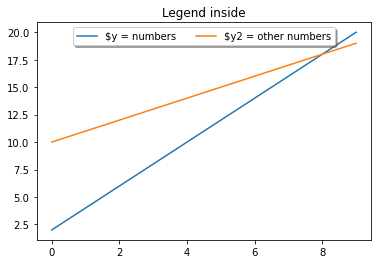

In [3]:
import matplotlib.pyplot as plt
import numpy as np

y = [2,4,6,8,10,12,14,16,18,20]
y2 = [10,11,12,13,14,15,16,17,18,19]
x = np.arange(10)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(x, y, label='$y = numbers')
ax.plot(x, y2, label='$y2 = other numbers')
plt.title('Legend inside')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
plt.show()

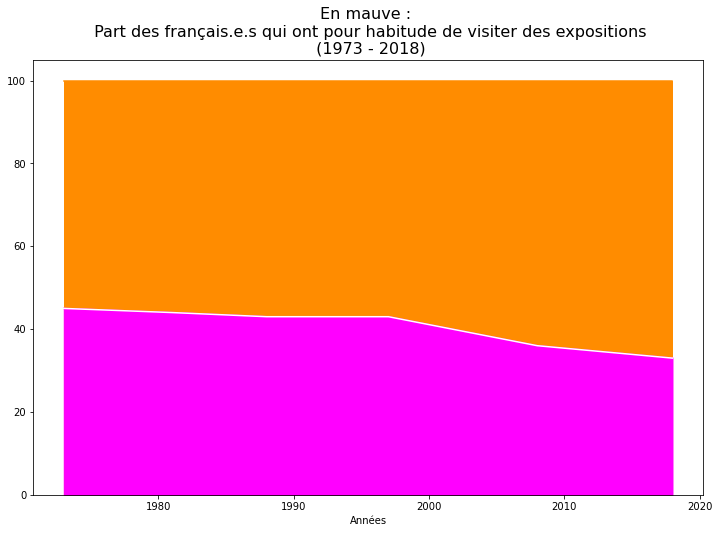

In [4]:
import numpy as np

univers_visiteurs_de_musee = culture_patrimoniale.append(eclectisme_classique).append(eclectisme_augmente)
univers_non_visiteurs_de_musee = petit_ecran.append(bain_audiovisuel).append(tout_numerique)
annees = [1973, 1981, 1988, 1997, 2008, 2018]


somme_visiteur_de_musee_par_annee = []
somme_non_visiteur_de_musee_par_annee = []
for i in range(len(annees)) :
    subdtf_v = univers_visiteurs_de_musee[univers_visiteurs_de_musee['Année'] == annees[i]]
    subdtf_nv = univers_non_visiteurs_de_musee[univers_non_visiteurs_de_musee['Année'] == annees[i]]
    somme_visiteur_de_musee = subdtf_v['Part'].sum()
    somme_non_visiteur_de_musee = subdtf_nv['Part'].sum()
    somme_visiteur_de_musee_par_annee.append(somme_visiteur_de_musee)
    somme_non_visiteur_de_musee_par_annee.append(somme_non_visiteur_de_musee)

d_visiteurs = {'Années':annees,'Parts cumulées':somme_visiteur_de_musee_par_annee}
df_visiteurs = pd.DataFrame(d_visiteurs)

d_non_visiteurs = {'Années':annees,'Parts cumulées':[100, 100, 100, 100, 100, 100]}
df_non_visiteurs = pd.DataFrame(d_non_visiteurs)


fig , axs = plt.subplots(figsize=(12,8))
plt.title('En mauve : \n Part des français.e.s qui ont pour habitude de visiter des expositions\n (1973 - 2018)', size = 16)
df_non_visiteurs.plot.area(x='Années', y='Parts cumulées', ax = axs, color = '#ff8c00', legend = False)
#ax.legend(loc='upper right', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
df_visiteurs.plot.area(x='Années', y='Parts cumulées', ax = axs, color = '#ff00ff', legend = False)
df_visiteurs.plot(x='Années', y='Parts cumulées', ax = axs, color = 'white', legend = False)
#ax.legend(loc='lower left', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
#plt.yticks(np.arange(110, step=10))
plt.show()



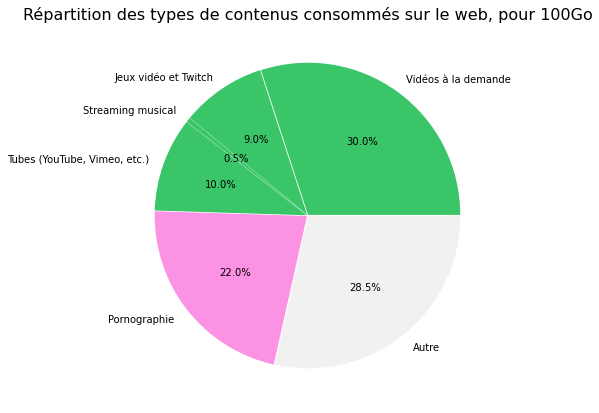

In [21]:
# Données du rapport
labels = ['Vidéos à la demande', 'Jeux vidéo et Twitch', 'Streaming musical', 'Tubes (YouTube, Vimeo, etc.)', 'Pornographie', 'Autre']
values = [30, 9, 0.5, 10, 22, (100 - 30 - 9 -0.5 -10 -22)]
titre = "Répartition des types de contenus consommés sur le web, pour 100Go"
#couleur_camembert_serge_gainsbourg = ["#f2cb26", "#00a154", "#0083c6", "#dc0036", "#fc8934", "#e3e3e3", "#fb85a7", "#00b3f0"]
couleur_camembert_serge_gainsbourg = ["#3ac569", "#3ac569", "#3ac569", "#3ac569", "#fc92e3", "#f1f1f1", "#ff8c00", "#ff00ff"]
affichage_pourcentage = "%1.1f%%"
eclatement_entre_les_tranches_de_calandos = 0.005

# CAMEMBERISATION
explode = (eclatement_entre_les_tranches_de_calandos,)*len(labels)
fig = plt.figure(figsize = (10, 7))
plt.pie(values, labels = labels, autopct=affichage_pourcentage, colors=couleur_camembert_serge_gainsbourg, explode = explode)
plt.title(titre, size = 16)
plt.show()

In [4]:
print("Part de visiteurs potentiels de musée en 1973 : " + str(somme_visiteur_de_musee_par_annee[0])+'%')
print("Part de visiteurs potentiels de musée en 2018 : " + str(somme_visiteur_de_musee_par_annee[-1])+'%')

Part de visiteurs potentiels de musée en 1973 : 45%
Part de visiteurs potentiels de musée en 2018 : 33%


In [5]:
taux_de_perte_de_points = (somme_visiteur_de_musee_par_annee[0] - somme_visiteur_de_musee_par_annee[-1]) / somme_visiteur_de_musee_par_annee[0]
print ("taux de perte = " + str(taux_de_perte_de_points*100) +"%")

taux de perte = 26.666666666666668%


### Bilan

La part de public potentiellement amené à visiter une exposition décroît au fil du temps. Elle a perdu 12 points en 50 ans, soit une baisse de plus d'1/4 (26.7%).

La décroissance la plus forte a eu lieu entre 1998 et 2008. Comme si un virage était mal négocié ;)